#### Loading packages and database

In [1]:
library(here)
source(here("modules","data_cleaning.r"))

here() starts at C:/Users/raquel.santos/Documents/GitHub/CaseCaldeiras-notebooks/Jupyter


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:MASS':

    select


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks plotly::filter(), stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks plotly::select(), MASS::select()

Attaching package: 'EnvStats'


The following object is masked from 'package:MASS':

    boxcox


The following objects are masked from 'package:stats':

    pr

[1] "C:/Users/raquel.santos/Documents/GitHub/CaseCaldeiras-notebooks/Jupyter/Data/AnaliseAtualizada-BDCaldeiras_13Jun22_RevAndrea.csv"


Warning message in lapply(my_data[, numeric_columns], as.numeric):
"NAs introduzidos por coerção"
`summarise()` has grouped output by 'TipodeProduto',
'Andrea_DEPARTAMENTO.Descricao'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Depart', 'Prod.Nome'. You can override
using the `.groups` argument.
Joining, by = c("Depart", "Prod.Nome", "Item.Cod")


#### Create dummy variables

Foi feita a transformação nos dados para representar uma variável categórica de forma binária (indica presença ou ausência de um valor)

Foram criados gráficos de correlação para apontar a dependencia entre as variáveis.

Warning message in cor(data, use = method[1], method = method[2]):
"o desvio padrão é zero"
Warning message in cor(data, use = method[1], method = method[2]):
"o desvio padrão é zero"


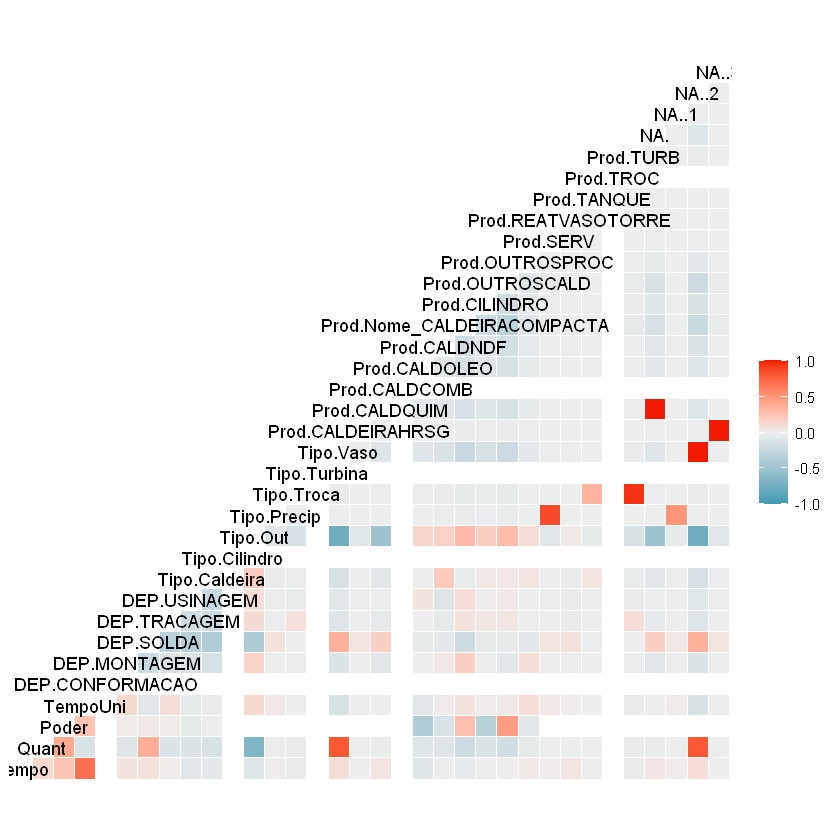

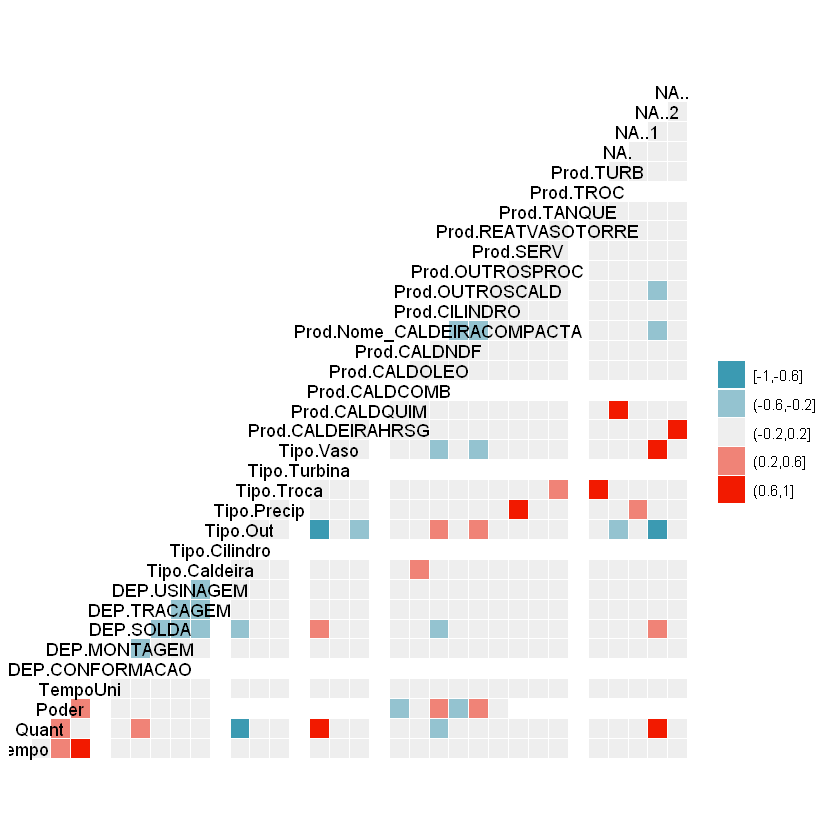

In [2]:
ggcorr(my_dummies)#função de visualização para plotar uma matriz de correlação
ggcorr(my_dummies, nbreaks = 5) #nbreakrs: especifica quantas quebras devem estar contidas na escala de cores

Correlation containing Power is the only one that correlates the boiler product type

Warning message in cor(my_dummies[!is.na(my_dummies$Poder), ]):
"o desvio padrão é zero"
Warning message in cor(my_dummies[is.na(my_dummies$Poder), ]):
"o desvio padrão é zero"


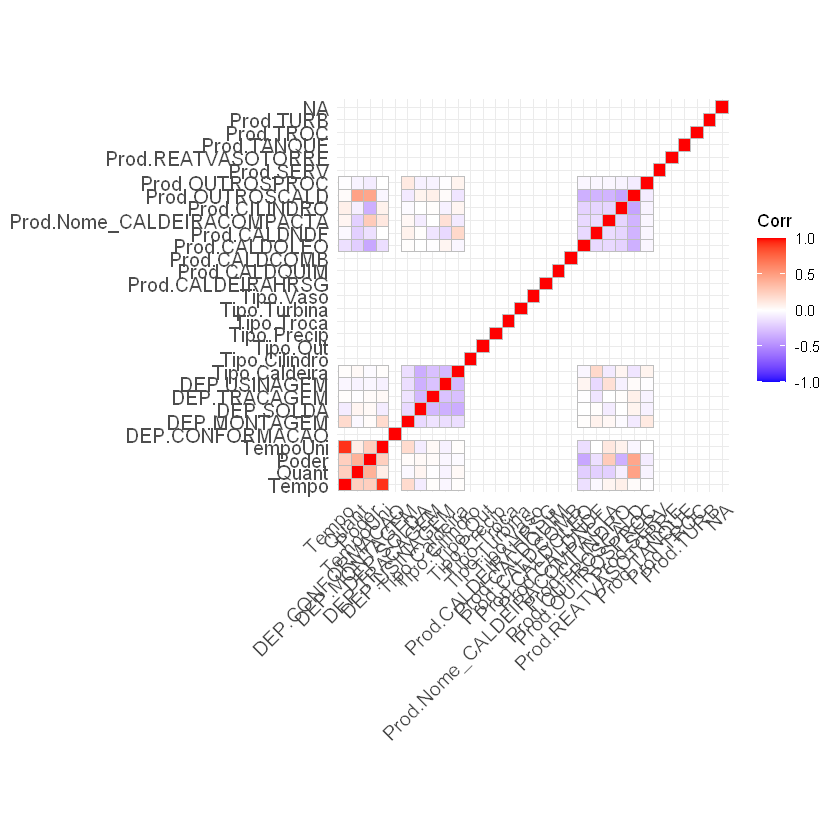

,HorasUnit,Qtd,Poder.Z,Poder.Lin,Depart_CONFORMACAO,Depart_MONTAGEM,Depart_SOLDA,Depart_TRACAGEM,Depart_USINAGEM,Prod.Nome_CALDEIRA COMPACTA,⋯,Item.Cod_1128,Item.Cod_1129,Item.Cod_1131,Item.Cod_1132,Item.Cod_1133,Item.Cod_1134,Item.Cod_1151,Item.Cod_1152,Item.Cod_1154,Item.Cod_1600
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,4030.0,1,NA,NA,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,66.0,1,NA,NA,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,2970.0,1,NA,NA,1,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
4,13513.5,2,156,66,1,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
5,48.0,1,59,46,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,1775.0,1,59,46,1,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0


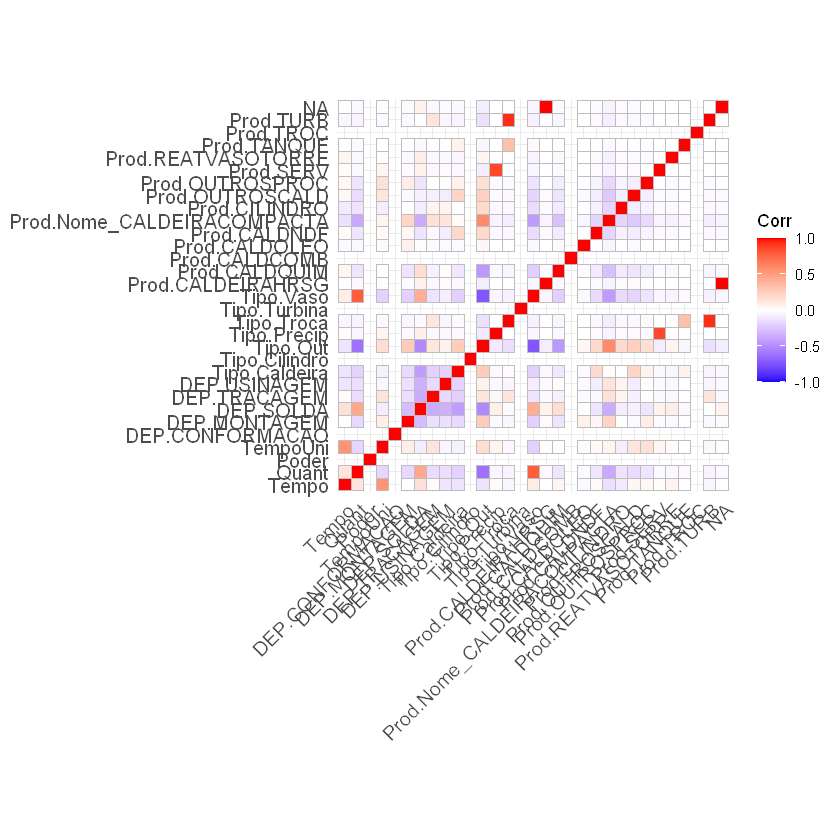

In [3]:
correlacoesPODER <- cor(my_dummies[!is.na(my_dummies$Poder),]) # possui caldeiras
correlacoesNA <- cor(my_dummies[is.na(my_dummies$Poder),]) # não possui caldeiras
ggcorrplot(correlacoesPODER) # matriz de correlaçãoo
ggcorrplot(correlacoesNA)
head(dummies_frequentes)

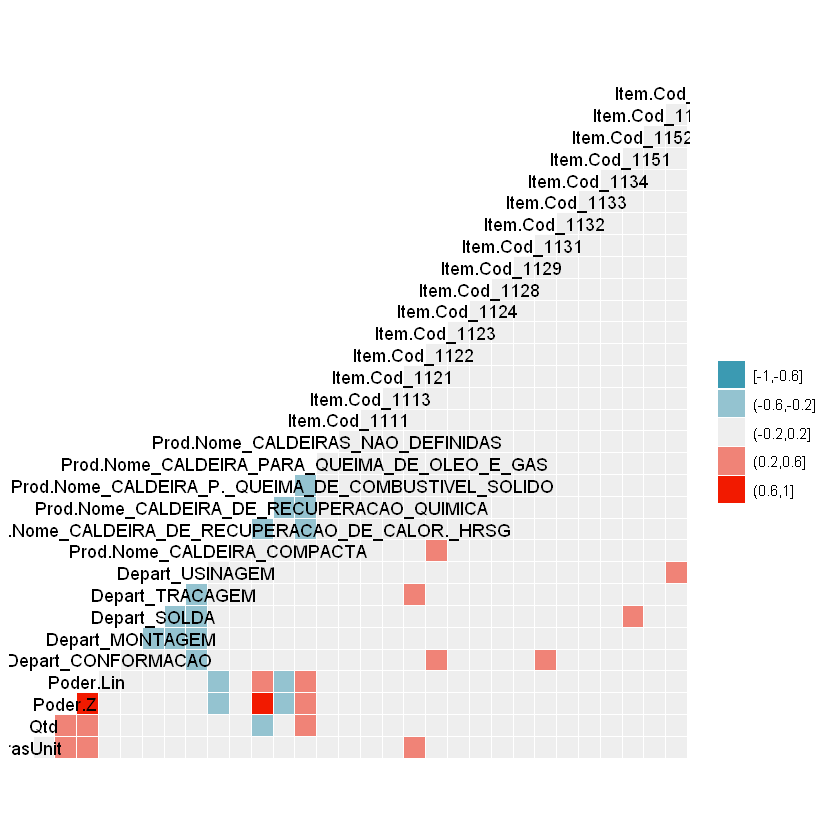

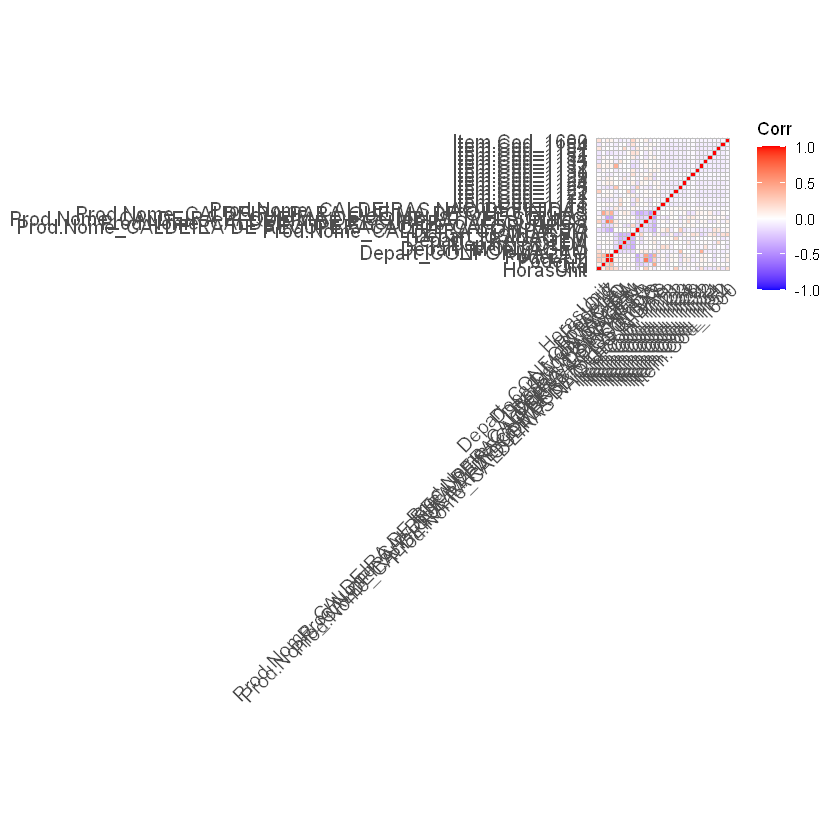

[1] 0.2729438

[1] 0.2532289

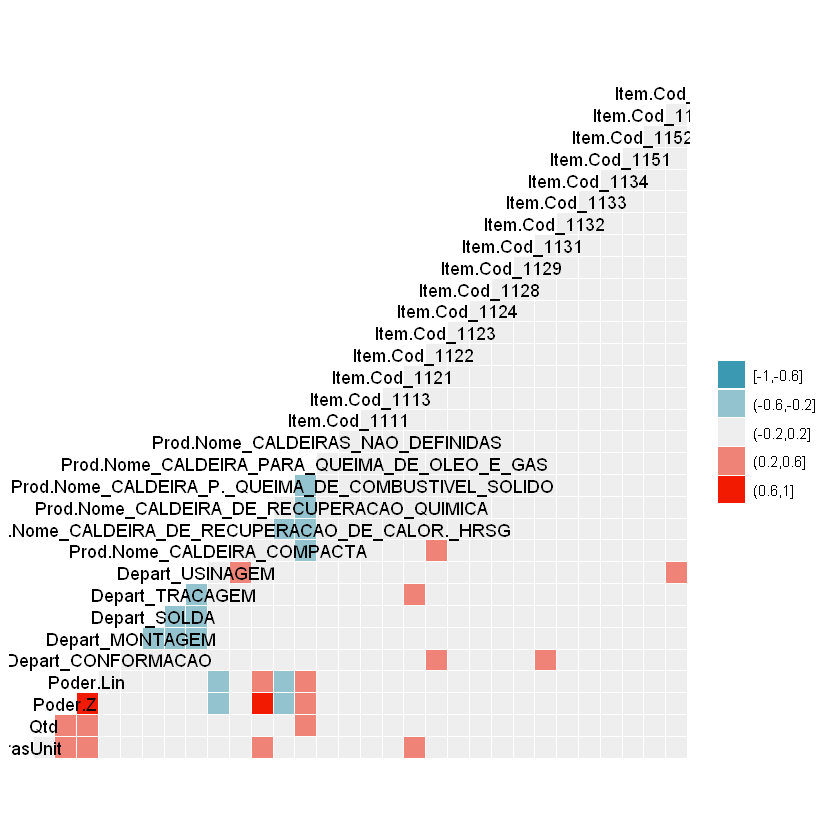

In [4]:
# correlations for most frequent boilers
correlacoesFREQUENTES <- cor(dummies_frequentes)
ggcorr(dummies_frequentes, nbreaks = 5)
correlacoesFREQUENTESNotNA <- cor(dummies_frequentes[!is.na(dummies_frequentes$Poder.Lin),])
ggcorrplot(correlacoesFREQUENTESNotNA)
ggcorr(dummies_frequentes[!is.na(dummies_frequentes$Poder.Lin),], nbreaks = 5)

correlacoesFREQUENTESNotNA['Poder.Z',"HorasUnit"]
correlacoesFREQUENTESNotNA['Poder.Lin',"HorasUnit"]

Warning message in cor(data, use = method[1], method = method[2]):
"o desvio padrão é zero"
Warning message in cor(data, use = method[1], method = method[2]):
"o desvio padrão é zero"


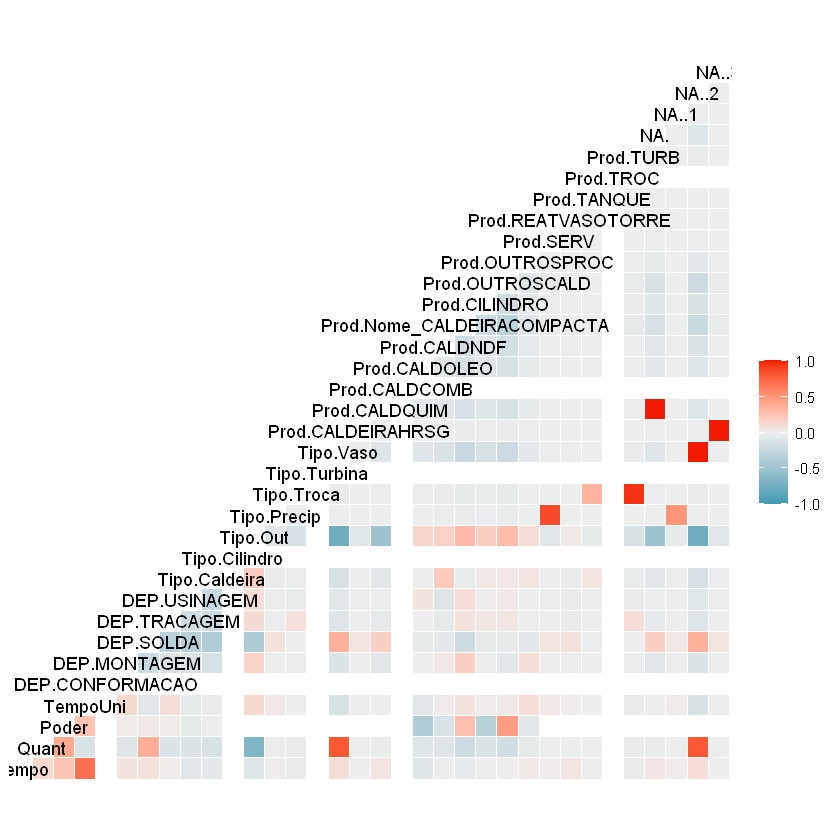

Warning message in cor(my_dummies[!is.na(my_dummies$Poder), ]):
"o desvio padrão é zero"
Warning message in cor(my_dummies[is.na(my_dummies$Poder), ]):
"o desvio padrão é zero"


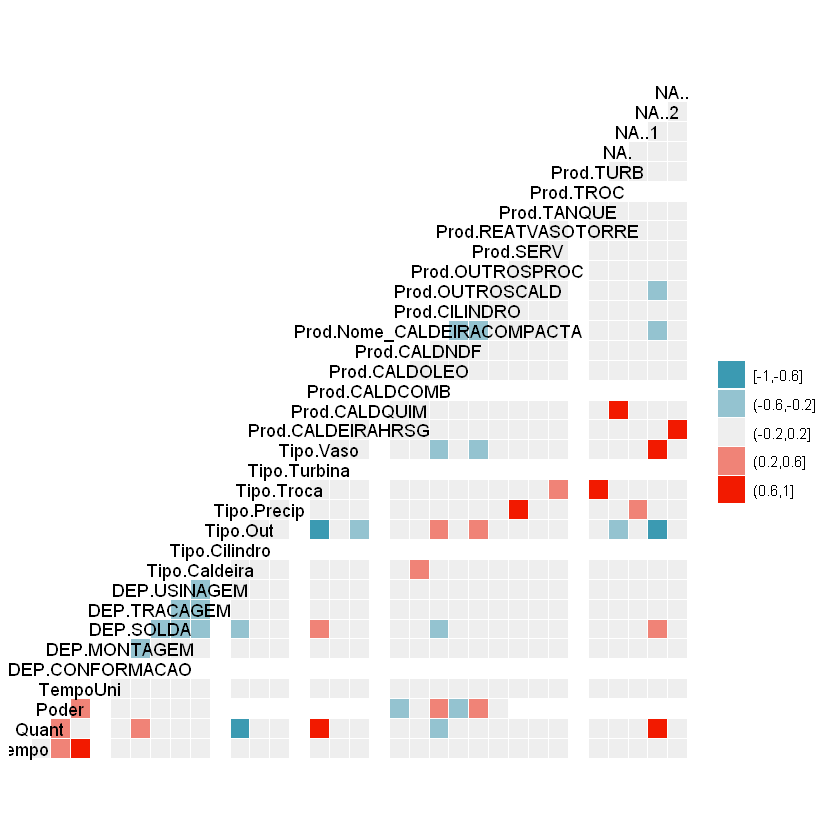

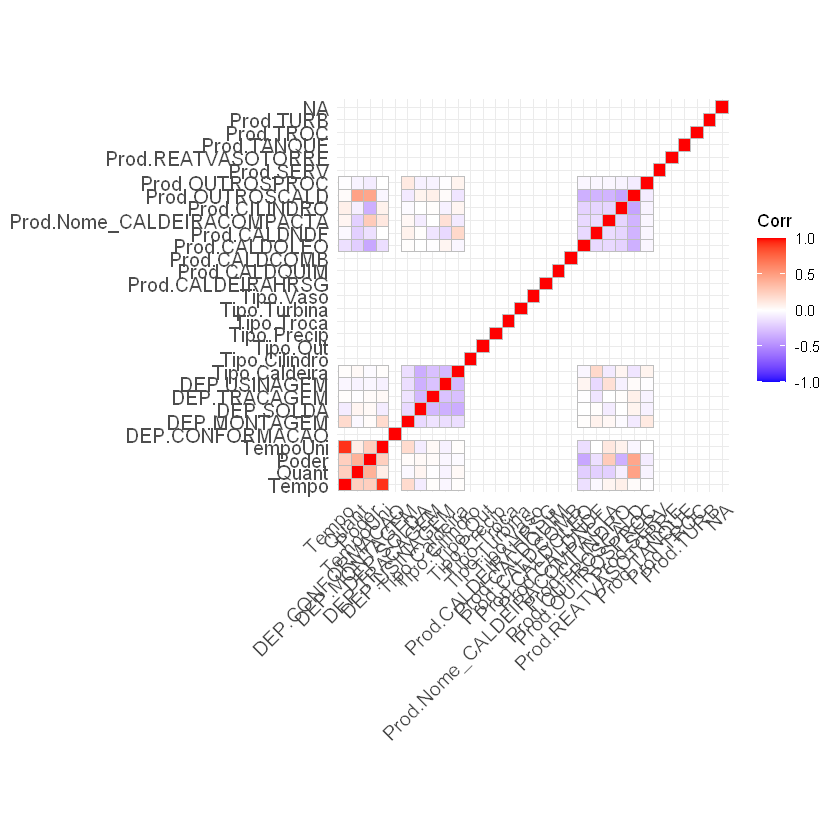

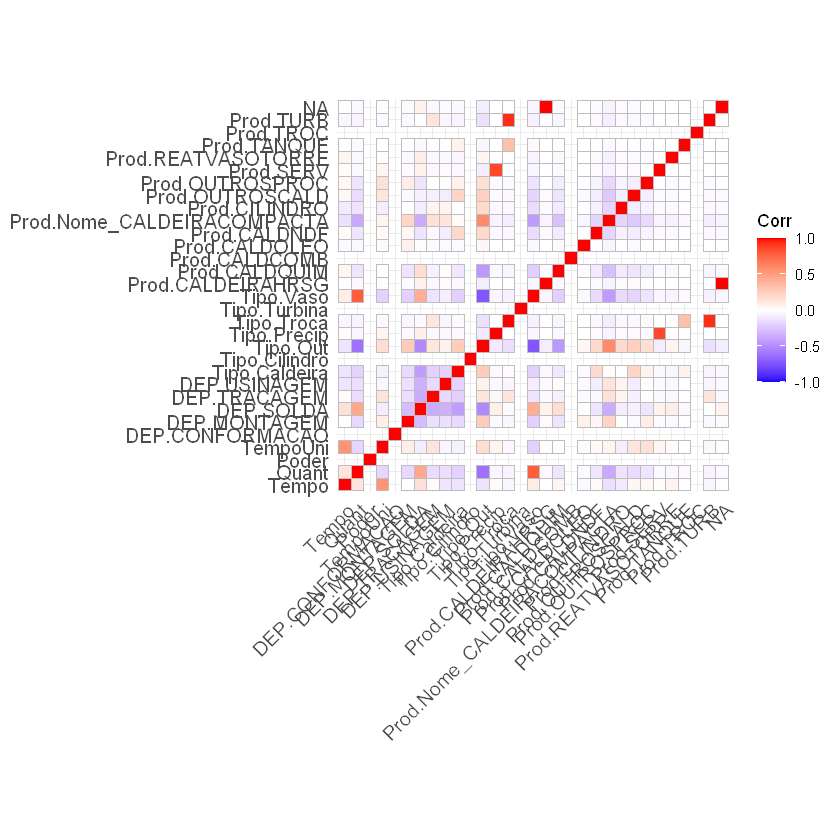

In [5]:
ggcorr(my_dummies)
ggcorr(my_dummies, nbreaks = 5) 

correlacoesPODER <- cor(my_dummies[!is.na(my_dummies$Poder),])
correlacoesNA <- cor(my_dummies[is.na(my_dummies$Poder),])
ggcorrplot(correlacoesPODER) #matriz de correlação
ggcorrplot(correlacoesNA)